In [1]:
!git clone "https://github.com/bumble-tech/private-detector.git"

Cloning into 'private-detector'...
remote: Enumerating objects: 37, done.
remote: Counting objects: 100% (37/37), done.
remote: Compressing objects: 100% (37/37), done.
remote: Total 37 (delta 10), reused 20 (delta 0), pack-reused 0
Unpacking objects: 100% (37/37), 50.62 KiB | 673.00 KiB/s, done.


# Bumble Private Detector

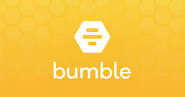

This is the repo for Bumble's Private Detector™ model - an image classifier that can detect lewd images.

The internal repo has been heavily refactored and released as a fully open-source project to allow for the wider community to use and finetune a Private Detector model of their own. You can download the pretrained SavedModel and checkpoint

taken and adapted entirely from "https://github.com/bumble-tech/private-detector#private-detector"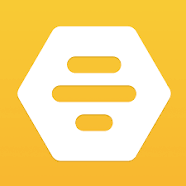

In [2]:
%cd private-detector

/kaggle/working/private-detector


In [3]:
import argparse
from typing import List

import tensorflow as tf
from absl import logging as absl_logging

from private_detector.utils.preprocess import preprocess_for_evaluation


def read_image(filename: str) -> tf.Tensor:
    """
    Load and preprocess image for inference with the Private Detector

    Parameters
    ----------
    filename : str
        Filename of image

    Returns
    -------
    image : tf.Tensor
        Image ready for inference
    """
    image = tf.io.read_file(filename)
    image = tf.io.decode_jpeg(image, channels=3)

    image = preprocess_for_evaluation(
        image,
        480,
        tf.float16
    )

    image = tf.reshape(image, -1)

    return image


def inference(model: str , image_paths: List[str]) -> None:
    """
    Get predictions with a Private Detector model

    Parameters
    ----------
    model : str
        Path to saved model
    image_paths : List[str]
        Path(s) to image to be predicted on
    """
    print(image_paths)
    model = tf.saved_model.load(model)

    for image_path in image_paths:
        print(image_path)
        image = read_image(image_path)

        preds = model([image])

        print(f'Probability: {100 * tf.get_static_value(preds[0])[0]:.2f}% - {image_path}')




In [4]:
# downloading the pretrained model
!wget "https://storage.googleapis.com/private_detector/private_detector.zip"

--2022-10-26 19:27:15--  https://storage.googleapis.com/private_detector/private_detector.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.213.128, 74.125.134.128, 173.194.218.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.213.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 395624935 (377M) [application/zip]
Saving to: ‘private_detector.zip’

private_detector.zi 100%[===================>] 377.30M   171MB/s    in 2.2s    

2022-10-26 19:27:17 (171 MB/s) - ‘private_detector.zip’ saved [395624935/395624935]



In [5]:
!dir

LICENSE    environment.yaml  private_detector	   train.py
README.md  inference.py      private_detector.zip


In [6]:
!unzip ./private_detector.zip -d downloaded

Archive:  ./private_detector.zip
   creating: downloaded/private_detector/
  inflating: downloaded/__MACOSX/._private_detector  
   creating: downloaded/private_detector/saved_checkpoint/
  inflating: downloaded/__MACOSX/private_detector/._saved_checkpoint  
  inflating: downloaded/private_detector/.DS_Store  
  inflating: downloaded/__MACOSX/private_detector/._.DS_Store  
   creating: downloaded/private_detector/saved_model/
  inflating: downloaded/__MACOSX/private_detector/._saved_model  
  inflating: downloaded/private_detector/LICENSE  
  inflating: downloaded/__MACOSX/private_detector/._LICENSE  
  inflating: downloaded/private_detector/saved_checkpoint/ckpt-0.9375-14.index  
  inflating: downloaded/__MACOSX/private_detector/saved_checkpoint/._ckpt-0.9375-14.index  
  inflating: downloaded/private_detector/saved_checkpoint/.DS_Store  
  inflating: downloaded/__MACOSX/private_detector/saved_checkpoint/._.DS_Store  
  inflating: downloaded/private_detector/saved_checkpoint/checkpoin

In [7]:
# getting the image
! wget "https://www.pngall.com/wp-content/uploads/2016/04/Happy-Person-Free-Download-PNG.png" -O "happy.png"

--2022-10-26 19:27:25--  https://www.pngall.com/wp-content/uploads/2016/04/Happy-Person-Free-Download-PNG.png
Resolving www.pngall.com (www.pngall.com)... 78.159.114.6
Connecting to www.pngall.com (www.pngall.com)|78.159.114.6|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [image/png]
Saving to: ‘happy.png’

happy.png               [ <=>                ]  26.93K  --.-KB/s    in 0s      

2022-10-26 19:27:26 (148 MB/s) - ‘happy.png’ saved [27575]



In [8]:
!ls -al
!pwd

total 386448
drwxr-xr-x 5 root root      4096 Oct 26 19:27 .
drwxr-xr-x 3 root root      4096 Oct 26 19:27 ..
drwxr-xr-x 8 root root      4096 Oct 26 19:27 .git
-rw-r--r-- 1 root root     11336 Oct 26 19:27 LICENSE
-rw-r--r-- 1 root root      5075 Oct 26 19:27 README.md
drwxr-xr-x 4 root root      4096 Oct 26 19:27 downloaded
-rw-r--r-- 1 root root       309 Oct 26 19:27 environment.yaml
-rw-r--r-- 1 root root     27575 Oct 26 19:27 happy.png
-rw-r--r-- 1 root root      1739 Oct 26 19:27 inference.py
drwxr-xr-x 3 root root      4096 Oct 26 19:27 private_detector
-rw-r--r-- 1 root root 395624935 Oct 25 12:21 private_detector.zip
-rw-r--r-- 1 root root     11074 Oct 26 19:27 train.py
/kaggle/working/private-detector


In [9]:
!dir

LICENSE    downloaded	     happy.png	   private_detector	 train.py
README.md  environment.yaml  inference.py  private_detector.zip


In [10]:
!ls
!pwd
!sudo apt install file -y
!file happy.png

LICENSE    downloaded	     happy.png	   private_detector	 train.py
README.md  environment.yaml  inference.py  private_detector.zip
/kaggle/working/private-detector



The following additional packages will be installed:
  libmagic-mgc libmagic1
The following NEW packages will be installed:
  file libmagic-mgc libmagic1
0 upgraded, 3 newly installed, 0 to remove and 74 not upgraded.
Need to get 317 kB of archives.
After this operation, 6174 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/main amd64 libmagic-mgc amd64 1:5.38-4 [218 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal/main amd64 libmagic1 amd64 1:5.38-4 [75.9 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal/main amd64 file amd64 1:5.38-4 [23.3 kB]
Fetched 317 kB in 1s (527 kB/s)

78Selecting previously unselected package libmagic-mgc.
(Reading database ... 106350 files and directories currently installed.)
Preparing to unpack .../libmagic-mgc_1%3a5.38-4_amd64.deb ...
7Progress: [  0%]

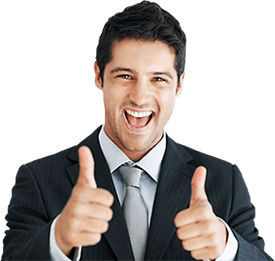

In [11]:
import os
from IPython.display import Image
Image(filename="/kaggle/working/private-detector/happy.png")

In [12]:
tf.get_logger().setLevel('ERROR')
absl_logging.set_verbosity(absl_logging.ERROR)

#parser = argparse.ArgumentParser()

#parser.add_argument(
#        '--model',
#        type=str,
#        required=True,
#        help='Location of SavedModel to load'
#    )

#parser.add_argument(
#        '--image_paths',
#        type=str,
#        nargs='+',
#        required=True,
#        help='Paths to image paths to predict for'
#    )

#args = parser.parse_args()
#inference(**vars(args))

inference('./downloaded/private_detector/saved_model/',['/kaggle/working/private-detector/happy.png'] )


['/kaggle/working/private-detector/happy.png']


2022-10-26 19:27:42.404207: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


/kaggle/working/private-detector/happy.png


Cleanup called...
2022-10-26 19:28:03.580635: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Probability: 5.46% - /kaggle/working/private-detector/happy.png
